In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train_data=pd.read_csv("data/Train.csv")
test_data=pd.read_csv("data/Test (1).csv")

In [4]:
train_data.shape

(8523, 12)

In [5]:
train_data.sample(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7043,NCI29,8.6,Low Fat,0.032615,Health and Hygiene,142.9154,OUT035,2004,Small,Tier 2,Supermarket Type1,992.7078
3407,NCK42,NaN,Low Fat,0.013056,Household,215.9192,OUT027,1985,Medium,Tier 3,Supermarket Type3,7334.4528
1583,FDV33,9.6,Regular,0.027344,Snack Foods,257.8304,OUT046,1997,Small,Tier 1,Supermarket Type1,1808.3128
2148,DRJ37,10.8,Low Fat,0.061101,Soft Drinks,151.9024,OUT046,1997,Small,Tier 1,Supermarket Type1,2580.6408
3206,FDP58,NaN,Low Fat,0.236617,Snack Foods,217.6482,OUT019,1985,Small,Tier 1,Grocery Store,219.0482


In [7]:
train_data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [8]:
train_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [10]:
train_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [12]:
train_data.duplicated().sum()

0

In [13]:
train_data.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [15]:
train_data['Outlet_Age']= train_data ['Outlet_Establishment_Year'].apply(lambda year: 2023 - year)

In [17]:
train_data=train_data.drop(["Outlet_Establishment_Year"],axis=1)

In [18]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,24
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,14
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,24
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,NaN,Tier 3,Grocery Store,732.3800,25
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,36


In [23]:
corr_mat=train_data.corr()

C:\Users\Naga_\AppData\Local\Temp\ipykernel_243116\1557483688.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat=train_data.corr()


<Axes: >

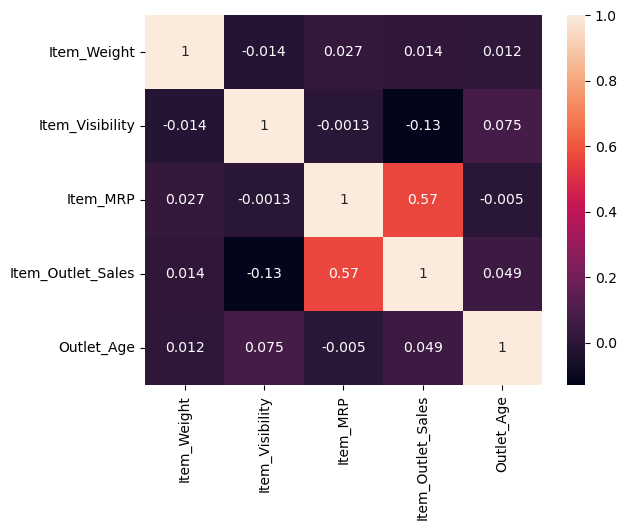

In [24]:
sns.heatmap(corr_mat,annot=True)

##### Univarite analysis

In [26]:
numerical_features = [feature for feature in train_data.columns if train_data[feature].dtype != 'O']
categorical_features = [feature for feature in train_data.columns if train_data[feature].dtype == 'O']

In [27]:
categorical_features

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [29]:
numerical_features

['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Item_Outlet_Sales',
 'Outlet_Age']

In [31]:
train_data['Item_Fat_Content'].nunique

<bound method IndexOpsMixin.nunique of 0       Low Fat
1       Regular
2       Low Fat
3       Regular
4       Low Fat
         ...   
8518    Low Fat
8519    Regular
8520    Low Fat
8521    Regular
8522    Low Fat
Name: Item_Fat_Content, Length: 8523, dtype: object>

<Axes: xlabel='Item_Fat_Content', ylabel='count'>

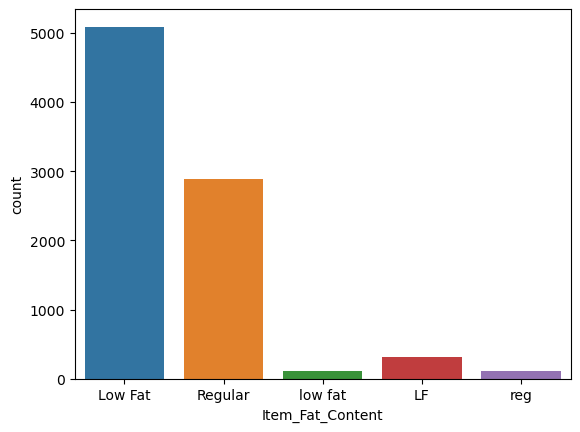

In [33]:
sns.countplot(x='Item_Fat_Content', data=train_data)

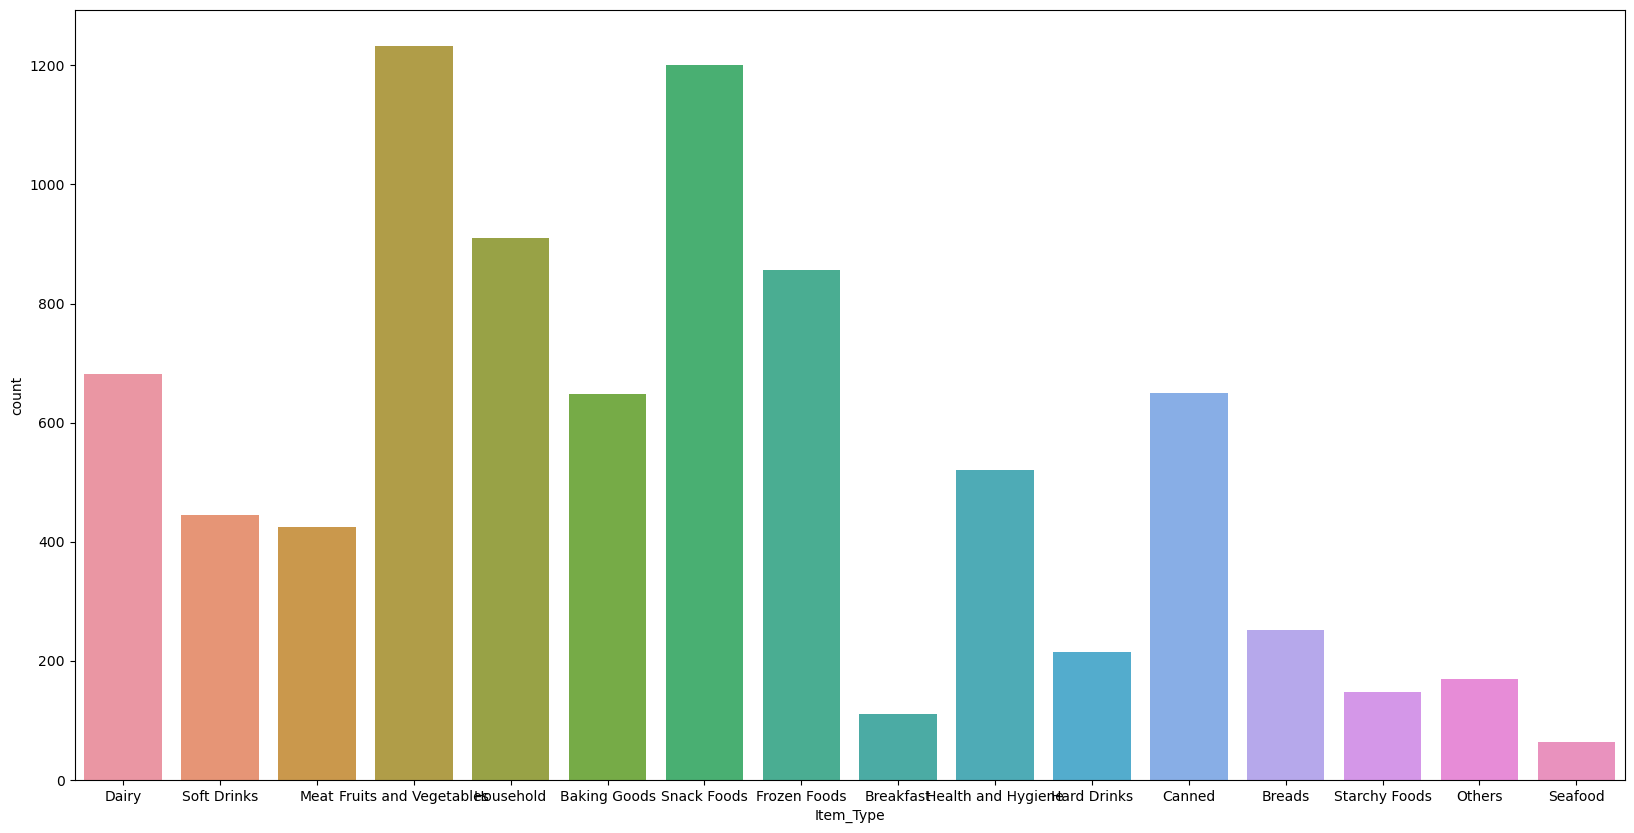

In [37]:
plt.figure(figsize=(20,10))
sns.countplot(x='Item_Type', data=train_data)
plt.show()

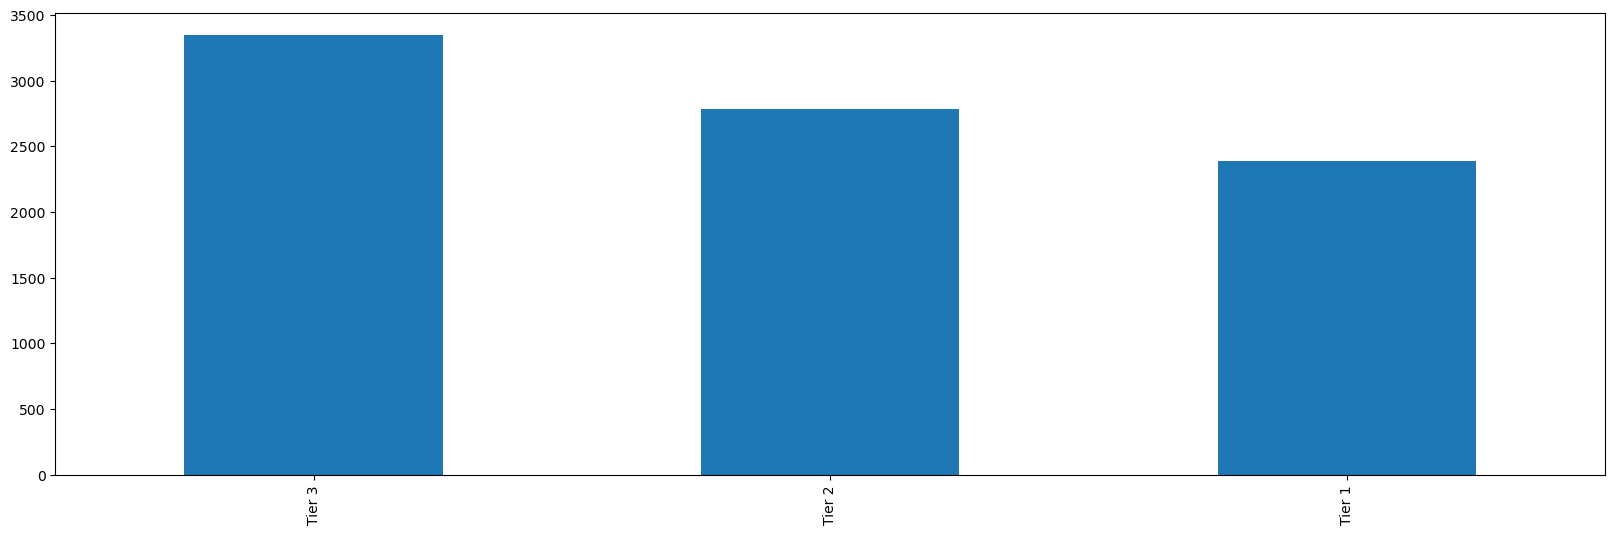

In [59]:
plt.figure(figsize=(20,6))
train_data['Outlet_Location_Type'].value_counts().plot(kind='bar')
plt.show()

<Axes: ylabel='Outlet_Type'>

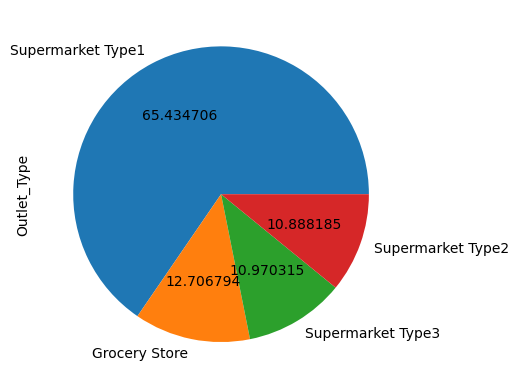

In [65]:
train_data['Outlet_Type'].value_counts().plot(kind='pie',autopct='%2f')

In [66]:
numerical_features

['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Item_Outlet_Sales',
 'Outlet_Age']

(array([2639., 2329., 1563.,  979.,  593.,  279.,   60.,   35.,   29.,
          17.]),
 array([0.        , 0.03283909, 0.06567819, 0.09851728, 0.13135638,
        0.16419547, 0.19703457, 0.22987366, 0.26271276, 0.29555185,
        0.32839095]),
 <BarContainer object of 10 artists>)

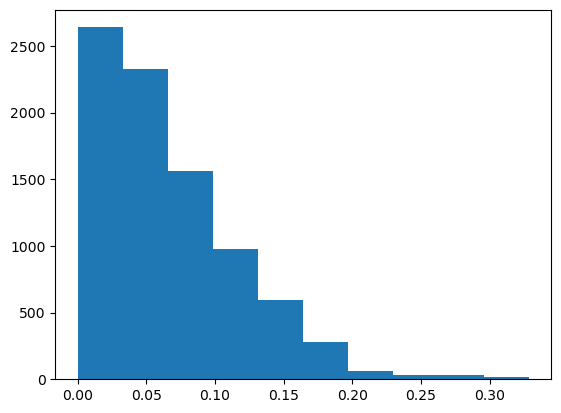

In [73]:

plt.hist(train_data['Item_Visibility'])


<Axes: >

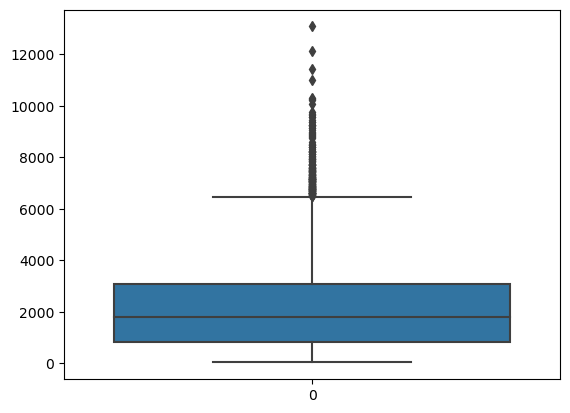

In [75]:
sns.boxplot(train_data['Item_Outlet_Sales'])

##### Bivariate analysis

<Axes: xlabel='Item_MRP', ylabel='Item_Weight'>

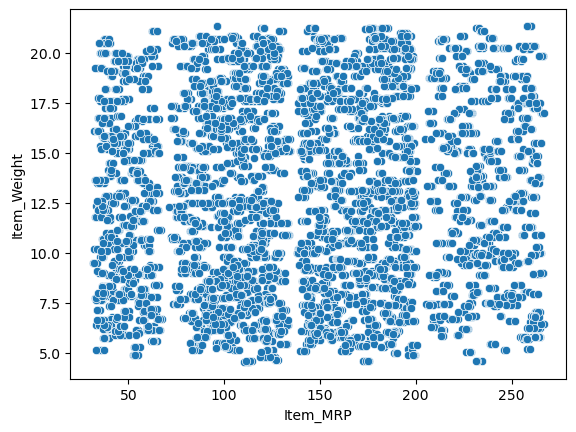

In [79]:
sns.scatterplot(x='Item_MRP', y='Item_Weight', data=train_data)

<Axes: xlabel='Item_MRP', ylabel='Item_Visibility'>

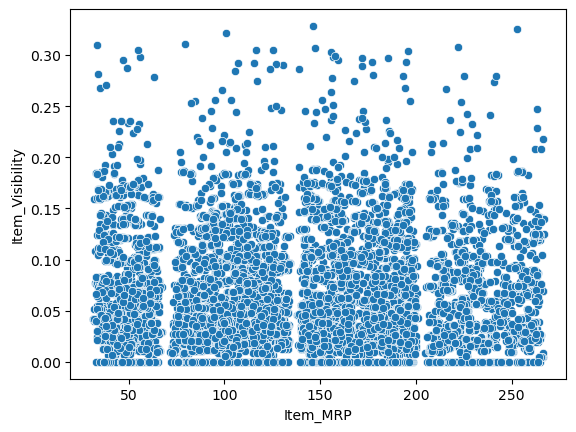

In [80]:
sns.scatterplot(x='Item_MRP', y='Item_Visibility', data=train_data)

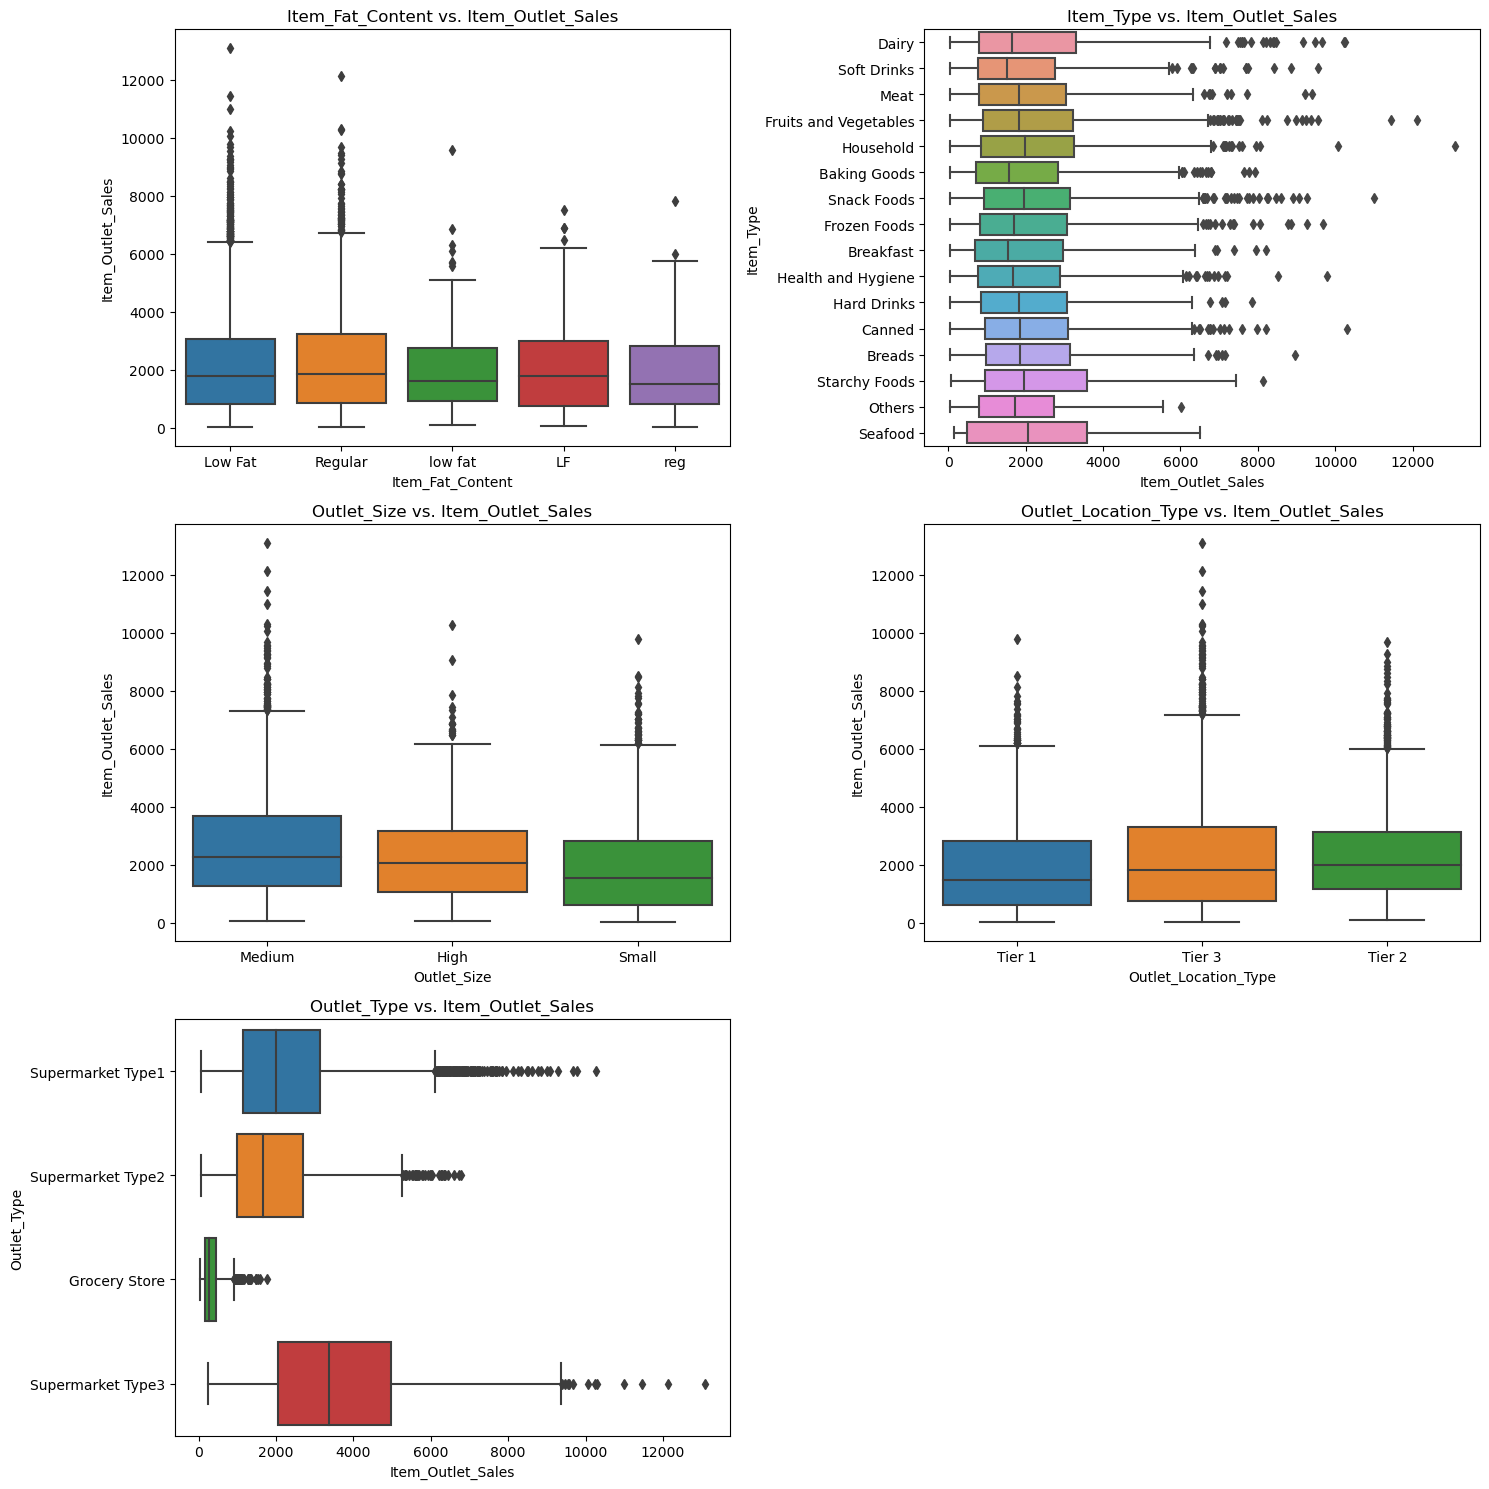

In [83]:
# Create subplots for box plots
plt.figure(figsize=(15, 15))

# Box Plot for Item_Fat_Content vs. Item_Outlet_Sales
plt.subplot(321)
sns.boxplot(data=train_data, x='Item_Fat_Content', y='Item_Outlet_Sales')
plt.title('Item_Fat_Content vs. Item_Outlet_Sales')

# Box Plot for Item_Type vs. Item_Outlet_Sales
plt.subplot(322)
sns.boxplot(data=train_data, y='Item_Type', x='Item_Outlet_Sales')
plt.title('Item_Type vs. Item_Outlet_Sales')

# Box Plot for Outlet_Size vs. Item_Outlet_Sales
plt.subplot(323)
sns.boxplot(data=train_data, x='Outlet_Size', y='Item_Outlet_Sales')
plt.title('Outlet_Size vs. Item_Outlet_Sales')

# Box Plot for Outlet_Location_Type vs. Item_Outlet_Sales
plt.subplot(324)
sns.boxplot(data=train_data, x='Outlet_Location_Type', y='Item_Outlet_Sales')
plt.title('Outlet_Location_Type vs. Item_Outlet_Sales')

# Box Plot for Outlet_Type vs. Item_Outlet_Sales
plt.subplot(325)
sns.boxplot(data=train_data, y='Outlet_Type', x='Item_Outlet_Sales')
plt.title('Outlet_Type vs. Item_Outlet_Sales')

plt.tight_layout()
plt.show()


##### Multivarite analysis

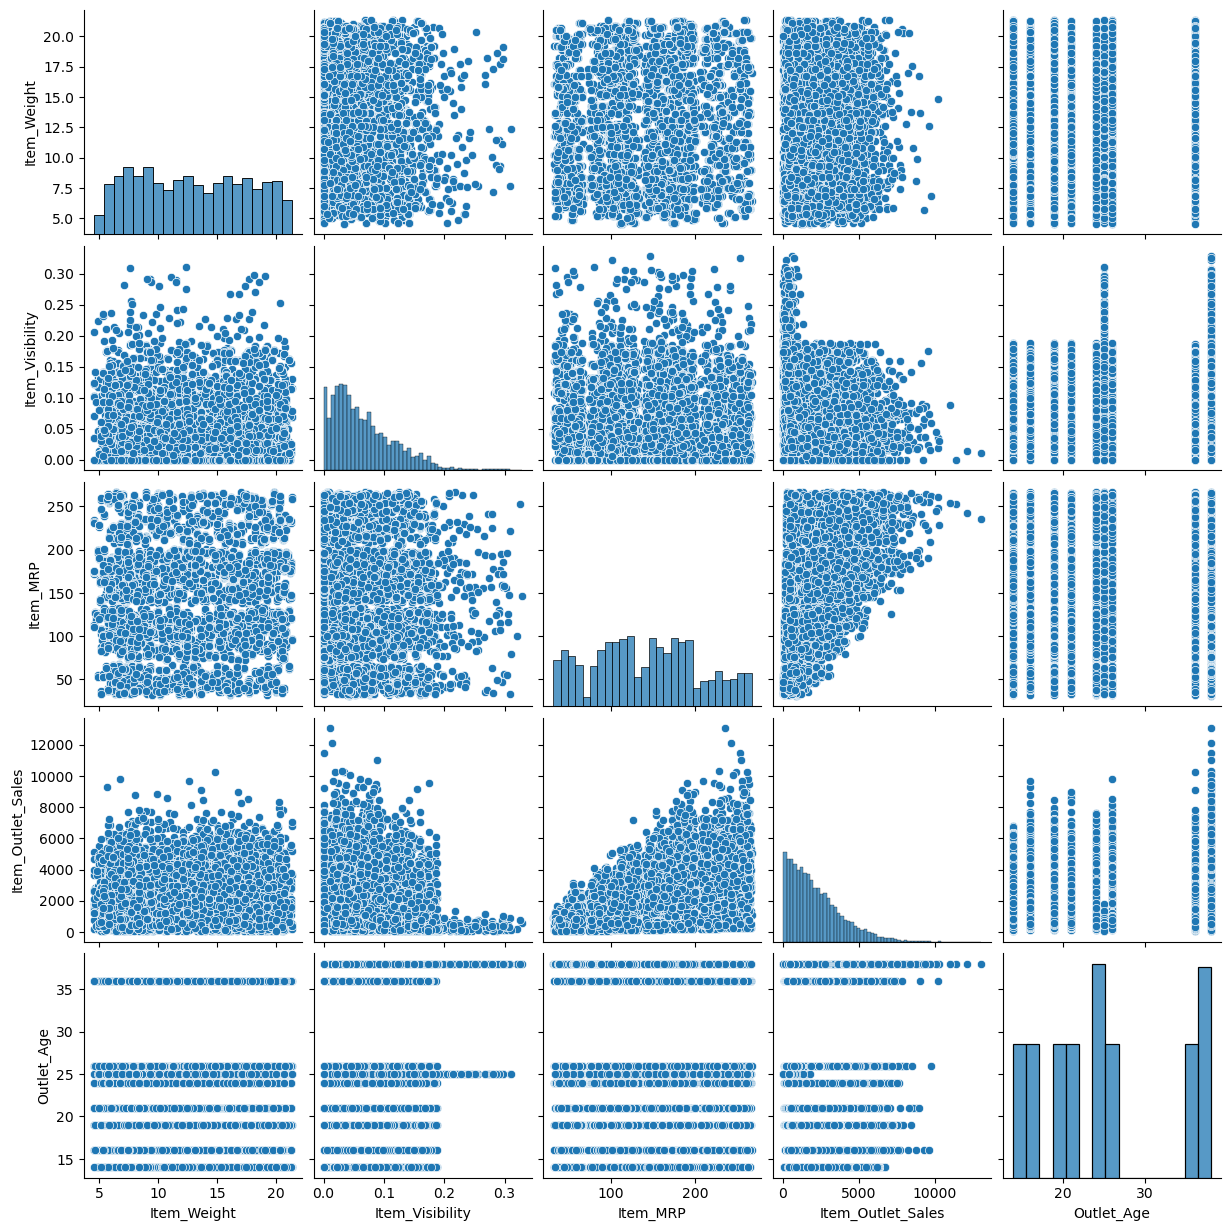

In [86]:
sns.pairplot(train_data)